In [1]:
import gym

In [22]:
env = gym.make('FrozenLake-v1',render_mode="rgb_array")

In [23]:
print(env.observation_space.n)
print(env.action_space.n)

16
4


In [24]:
env.reset()

(0, {'prob': 1})

In [25]:
action = env.action_space.sample()
print(action)

2


In [26]:
observation, reward, done,trauncated, info = env.step(action)

In [28]:
env.render()

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]

In [29]:
#building q table

In [1]:
import numpy as np
import gym
import time

In [2]:
env  = gym.make('FrozenLake-v1',render_mode="rgb_array")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [3]:
q = np.zeros((STATES,ACTIONS))
q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [4]:
EPISODES = 10000
MAX_STEPS = 100
LEARNING_RATE = 0.81
GAMMA = 0.96


In [5]:
epsilon = 0.8
RENDER = False

In [6]:
rewards = []

for episode in range(EPISODES):
    
    state = env.reset()
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            #if state == int:
            action = np.argmax(q[state,:])
        
        next_state, reward, done,trauncated,info = env.step(action)
        #if state == int:
        q[state,action] = q[state,action] + LEARNING_RATE*(reward + GAMMA*np.max(q[next_state,:]) - q[state,action])
        state = next_state

        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break
print(q)
print("Score over time: " +  str(sum(rewards)/EPISODES))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

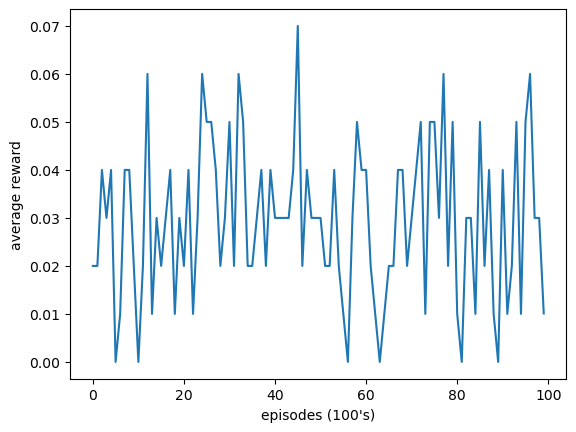

In [75]:
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0,len(rewards),100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()
